In [1]:
#Sentimental analysis using 
#1.VADER (Bag of words)
#2.Roberta (Huggingface Pipeline)

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import nltk 

In [3]:
df = pd.read_csv('nvidia_comments.csv')
df.head(50)

,Unnamed: 0,profile_name,comment
0,0,nextfuckinglevel,NVIDIA just released a new Eye Contact feature...
1,1,interestingasfuck,Nvidia's new AI can turn any primitive sketch ...
2,2,pcmasterrace,'Nvidia displays their entire stock of 3080s' ...
3,3,memes,I offer my kidneys to you nvidia
4,4,pcmasterrace,A finally honest upgrade list...
5,5,pcmasterrace,The best Nvidia card ever made?
6,6,assholedesign,The NVIDIA Shield uses an *Almost* but not act...
7,7,nvidia,No text
8,8,NvidiaStock,No text
9,9,NVDA_Stock,No text


In [9]:
df.shape

(51, 3)

In [10]:
#here we have some comments of which comments = profile name which are irrelevant 
#Data Cleaning 

# 1. Filter out rows with 'Unknown' profile name 
df = df[df["profile_name"] != "Unknown"]

# 2. Drop out 'profile_name'
df = df[df["profile_name"] != df["comment"]]

# 3. Filter out duplicates 
df = df.drop_duplicates(subset='comment', keep='first')

print(df)

    Unnamed: 0       profile_name   
0            0   nextfuckinglevel  \
1            1  interestingasfuck   
2            2       pcmasterrace   
3            3              memes   
4            4       pcmasterrace   
5            5       pcmasterrace   
6            6      assholedesign   
7            7             nvidia   
17          17       pcmasterrace   
18          18           politics   
19          19       pcmasterrace   
20          20       pcmasterrace   
21          21  mildlyinfuriating   
22          22  dontyouknowwhoiam   
23          23  interestingasfuck   

                                              comment  
0   NVIDIA just released a new Eye Contact feature...  
1   Nvidia's new AI can turn any primitive sketch ...  
2   'Nvidia displays their entire stock of 3080s' ...  
3                    I offer my kidneys to you nvidia  
4                    A finally honest upgrade list...  
5                     The best Nvidia card ever made?  
6   The NVIDIA 

In [46]:
df.rename(columns={'Unnamed: 0': 'ID no'},inplace =True)
df

,ID no,profile_name,comment
0,0,nextfuckinglevel,NVIDIA just released a new Eye Contact feature...
1,1,interestingasfuck,Nvidia's new AI can turn any primitive sketch ...
2,2,pcmasterrace,'Nvidia displays their entire stock of 3080s' ...
3,3,memes,I offer my kidneys to you nvidia
4,4,pcmasterrace,A finally honest upgrade list...
5,5,pcmasterrace,The best Nvidia card ever made?
6,6,assholedesign,The NVIDIA Shield uses an *Almost* but not act...
7,7,nvidia,No text
17,17,pcmasterrace,It is getting worse day by day.
18,18,politics,Dow Jones Dives 500 Points On Trump Comments; ...


In [47]:
#Basic Nltk 
example = df['comment'][4]
print(example)

A finally honest upgrade list...


In [48]:
import nltk 
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [49]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['A', 'finally', 'honest', 'upgrade', 'list', '...']

In [50]:
tags = nltk.pos_tag(tokens)
tags[:10]

[('A', 'DT'),
 ('finally', 'RB'),
 ('honest', 'JJ'),
 ('upgrade', 'JJ'),
 ('list', 'NN'),
 ('...', ':')]

In [51]:
nltk.download('words')
entity = nltk.chunk.ne_chunk(tags)
entity.pprint()

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


(S A/DT finally/RB honest/JJ upgrade/JJ list/NN .../:)


In [18]:
#1.VADER USING BAG OF WORDS *each word is scored and combined to a total score *using SentimentIntensityAnalyzer to get the neu/neg/pos scores of the Text


In [52]:
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm 

sa = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [53]:
sa.polarity_scores('nvidia is not that bad')

{'neg': 0.0, 'neu': 0.584, 'pos': 0.416, 'compound': 0.431}

In [58]:
#run polarity scores on the entire dataset
result = {}
for index, row in tqdm(df.iterrows(), total=len(df)):
    Comment = row['comment']  # Accessing the 'Text' column
    myid = row['ID no']
    result[myid] = sa.polarity_scores('comment')  # Getting sentiment scores

  0%|          | 0/15 [00:00<?, ?it/s]

In [59]:
result

{0: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 1: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 2: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 3: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 4: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 5: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 6: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 7: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 17: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 18: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 19: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 20: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 21: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 22: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 23: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}}

In [60]:
vader =pd.DataFrame(result).T  #t to invert the rows and columns 
vader = vader.reset_index().rename(columns={'index':'ID no'})
vader = vader.merge(df,how='left')

In [61]:
vader

,ID no,neg,neu,pos,compound,profile_name,comment
0,0,0.0,1.0,0.0,0.0,nextfuckinglevel,NVIDIA just released a new Eye Contact feature...
1,1,0.0,1.0,0.0,0.0,interestingasfuck,Nvidia's new AI can turn any primitive sketch ...
2,2,0.0,1.0,0.0,0.0,pcmasterrace,'Nvidia displays their entire stock of 3080s' ...
3,3,0.0,1.0,0.0,0.0,memes,I offer my kidneys to you nvidia
4,4,0.0,1.0,0.0,0.0,pcmasterrace,A finally honest upgrade list...
5,5,0.0,1.0,0.0,0.0,pcmasterrace,The best Nvidia card ever made?
6,6,0.0,1.0,0.0,0.0,assholedesign,The NVIDIA Shield uses an *Almost* but not act...
7,7,0.0,1.0,0.0,0.0,nvidia,No text
8,17,0.0,1.0,0.0,0.0,pcmasterrace,It is getting worse day by day.
9,18,0.0,1.0,0.0,0.0,politics,Dow Jones Dives 500 Points On Trump Comments; ...


In [63]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax

In [64]:
#Vader Result on example 
print(example)
sa.polarity_scores(example)

A finally honest upgrade list...


{'neg': 0.0, 'neu': 0.476, 'pos': 0.524, 'compound': 0.5106}

In [65]:
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification
import tensorflow as tf

# Load tokenizer and model
try:
    tokenizer = AutoTokenizer.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment-latest")
    model = TFAutoModelForSequenceClassification.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment-latest")
except Exception as e:
    print(f"Error loading model: {e}")
    model = None  # Set model to None in case of error
    tokenizer = None # Set tokenizer to None in case of error


# Example text
example = "This is great!"

if model and tokenizer: # Check if both model and tokenizer are loaded
    # Tokenize the text, returning TensorFlow tensors
    try:
        encoded_text = tokenizer(example, return_tensors='tf')  # 'tf' for TensorFlow tensors

        # Get the model output
        output = model(**encoded_text)

        # Print the output
        print(output)

        # To get the predicted class, you can use tf.argmax:
        predictions = tf.nn.softmax(output.logits, axis=1) # Apply softmax to get probabilities
        predicted_class = tf.argmax(predictions, axis=1)
        print(f"Predicted class: {predicted_class}")

    except Exception as e:
        print(f"Error during tokenization or inference: {e}")
else:
    print("Model or tokenizer could not be loaded.  Check the previous error messages.")


All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

Some layers of TFRobertaForSequenceClassification were not initialized from the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


TFSequenceClassifierOutput(loss=None, logits=<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[ 0.06720287, -0.05330356,  0.02525114]], dtype=float32)>, hidden_states=None, attentions=None)
Predicted class: [0]


In [78]:
#Run for Roberta Model 

encoded_text = tokenizer(example, return_tensors='tf')
output = model(**encoded_text)
scores = output[0][0].numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.35144597, 'roberta_neu': 0.3115468, 'roberta_pos': 0.3370072}


In [79]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='tf')
    output = model(**encoded_text)
    scores = output[0][0].numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [77]:
df

,ID no,profile_name,comment
0,0,nextfuckinglevel,NVIDIA just released a new Eye Contact feature...
1,1,interestingasfuck,Nvidia's new AI can turn any primitive sketch ...
2,2,pcmasterrace,'Nvidia displays their entire stock of 3080s' ...
3,3,memes,I offer my kidneys to you nvidia
4,4,pcmasterrace,A finally honest upgrade list...
5,5,pcmasterrace,The best Nvidia card ever made?
6,6,assholedesign,The NVIDIA Shield uses an *Almost* but not act...
7,7,nvidia,No text
17,17,pcmasterrace,It is getting worse day by day.
18,18,politics,Dow Jones Dives 500 Points On Trump Comments; ...


In [80]:
res2 = {}
for index, row in tqdm(df.iterrows(), total=len(df)):
    Comment = row['comment']  # Accessing the 'Text' column
    myid = row['ID no']    # Accessing the 'id' column
    res2[myid] = sa.polarity_scores(Comment)  # Getting sentiment scores

    roberta_result = polarity_scores_roberta(Comment)
    break

  0%|          | 0/15 [00:00<?, ?it/s]

In [81]:
roberta_result

{'roberta_neg': 0.35802895,
 'roberta_neu': 0.31458235,
 'roberta_pos': 0.32738873}

In [83]:
#on one of the example break due to text had some issued so wasnt able to run through
#skip this using try except instead of debugging

res = {}
for index, row in tqdm(df.iterrows(), total=len(df)):
    try:
        Comment = row['comment']  # Accessing the 'Text' column
        myid = row['ID no']    # Accessing the 'id' column
        vader_result = sa.polarity_scores(Comment)
        vader_result_rename = {}
        for key,value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value    
        roberta_result = polarity_scores_roberta(Comment)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both 
    except Exception as e:
        print(f'Broke for id {myid}: {e}')
        


  0%|          | 0/15 [00:00<?, ?it/s]

In [84]:
both

{'vader_neg': 0.0,
 'vader_neu': 0.714,
 'vader_pos': 0.286,
 'vader_compound': 0.25,
 'roberta_neg': 0.37496093,
 'roberta_neu': 0.2733094,
 'roberta_pos': 0.3517297}

In [85]:
result_df = pd.DataFrame(res).T  #t to invert the rows and columns 
result_df = result_df.reset_index().rename(columns={'index':'ID no'})
result_df = result_df.merge(df,how='left')

In [86]:
result_df

,ID no,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,profile_name,comment
0,0,0.000,1.000,0.000,0.0000,0.358029,0.314582,0.327389,nextfuckinglevel,NVIDIA just released a new Eye Contact feature...
1,1,0.000,0.709,0.291,0.6249,0.350593,0.293168,0.356240,interestingasfuck,Nvidia's new AI can turn any primitive sketch ...
2,2,0.000,1.000,0.000,0.0000,0.320681,0.323213,0.356105,pcmasterrace,'Nvidia displays their entire stock of 3080s' ...
3,3,0.000,1.000,0.000,0.0000,0.364489,0.303165,0.332346,memes,I offer my kidneys to you nvidia
4,4,0.000,0.476,0.524,0.5106,0.373631,0.312298,0.314071,pcmasterrace,A finally honest upgrade list...
5,5,0.000,0.543,0.457,0.6369,0.317168,0.298309,0.384523,pcmasterrace,The best Nvidia card ever made?
6,6,0.241,0.759,0.000,-0.7684,0.324311,0.363343,0.312347,assholedesign,The NVIDIA Shield uses an *Almost* but not act...
7,7,0.688,0.312,0.000,-0.2960,0.350504,0.339145,0.310351,nvidia,No text
8,17,0.341,0.659,0.000,-0.4767,0.336255,0.384166,0.279579,pcmasterrace,It is getting worse day by day.
9,18,0.000,1.000,0.000,0.0000,0.329484,0.338280,0.332236,politics,Dow Jones Dives 500 Points On Trump Comments; ...


In [87]:
result_df.columns

Index(['ID no', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'profile_name', 'comment'],
      dtype='object')

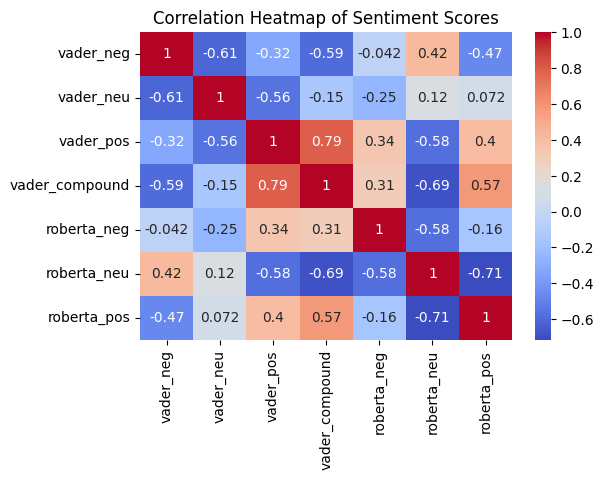

In [97]:
#using pairplots
sentiment_df = result_df[['vader_neg', 'vader_neu', 'vader_pos', 'vader_compound', 'roberta_neg', 'roberta_neu', 'roberta_pos']]

# Calculate correlation matrix
correlation_matrix = sentiment_df.corr()

# Create heatmap
plt.figure(figsize=(6,4))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True)
plt.title('Correlation Heatmap of Sentiment Scores')
plt.show()

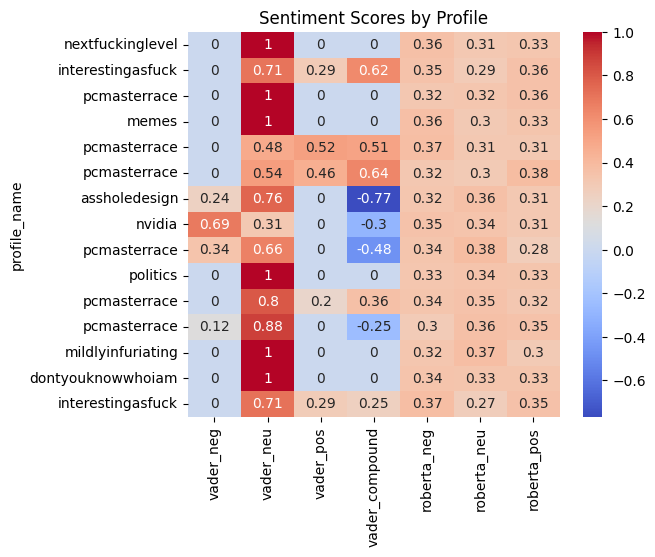

In [99]:
sentiment_df = result_df[['profile_name', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound', 'roberta_neg', 'roberta_neu', 'roberta_pos']]

# Pivot data if needed (not necessary here since each profile is unique)
# Create heatmap
plt.figure(figsize=(6,5))
sns.heatmap(sentiment_df.set_index('profile_name')[['vader_neg', 'vader_neu', 'vader_pos', 'vader_compound', 'roberta_neg', 'roberta_neu', 'roberta_pos']], cmap='coolwarm', annot=True)
plt.title('Sentiment Scores by Profile')
plt.show()

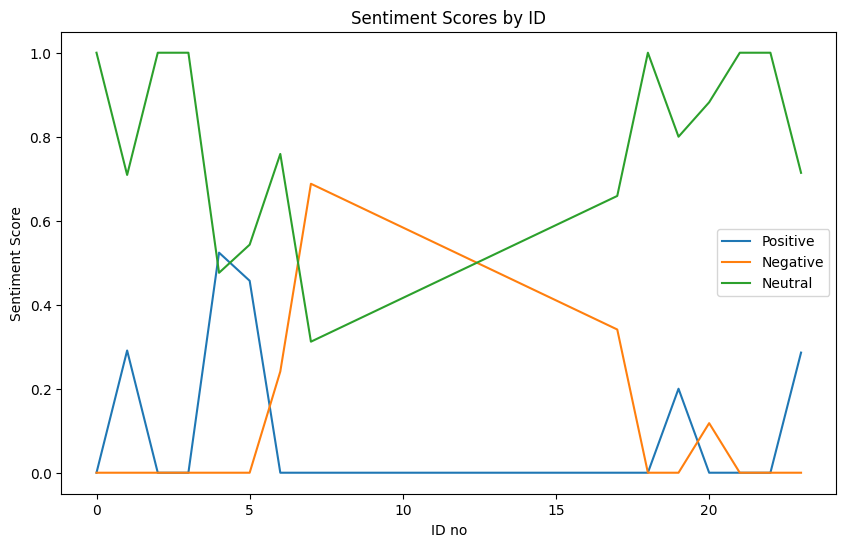

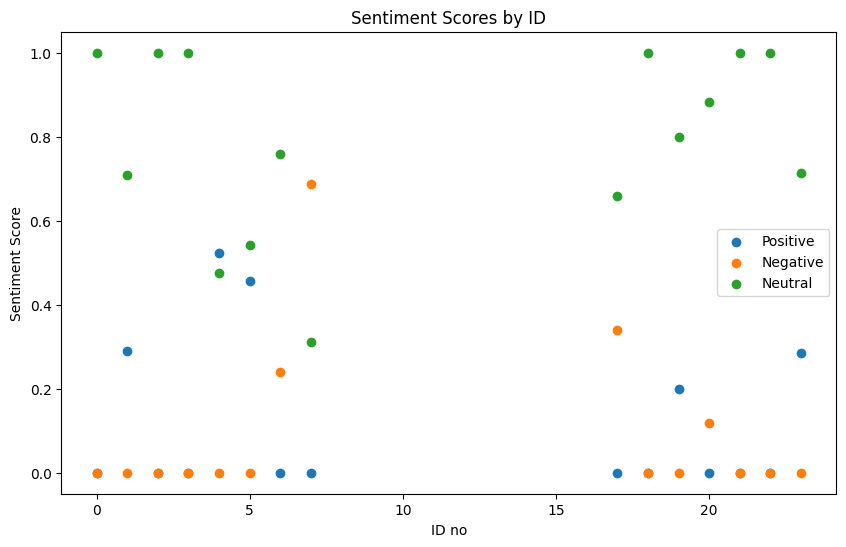

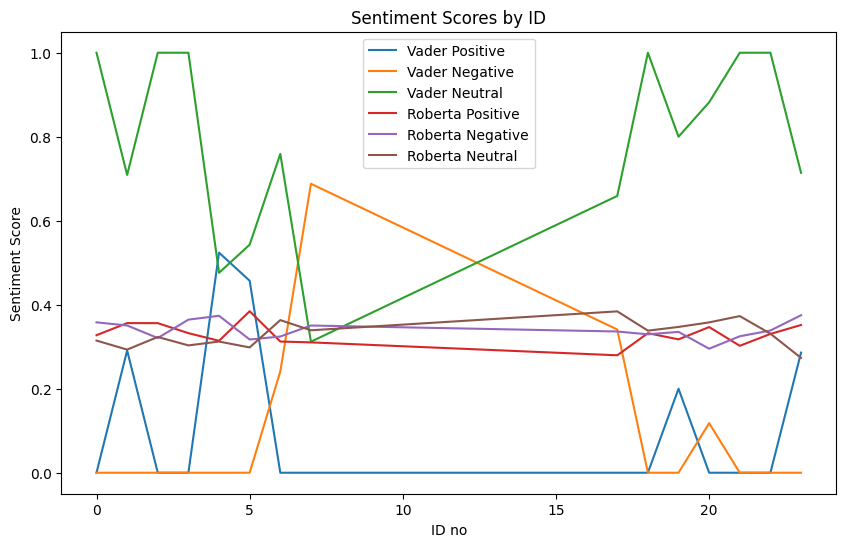

In [102]:
df = result_df.sort_values(by='ID no')  # Sort by ID for a clearer trend

plt.figure(figsize=(10, 6))
plt.plot(df['ID no'], df['vader_pos'], label='Positive')
plt.plot(df['ID no'], df['vader_neg'], label='Negative')
plt.plot(df['ID no'], df['vader_neu'], label='Neutral')
plt.xlabel('ID no')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Scores by ID')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(df['ID no'], df['vader_pos'], label='Positive')
plt.scatter(df['ID no'], df['vader_neg'], label='Negative')
plt.scatter(df['ID no'], df['vader_neu'], label='Neutral')
plt.xlabel('ID no')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Scores by ID')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(df['ID no'], df['vader_pos'], label='Vader Positive')
plt.plot(df['ID no'], df['vader_neg'], label='Vader Negative')
plt.plot(df['ID no'], df['vader_neu'], label='Vader Neutral')
plt.plot(df['ID no'], df['roberta_pos'], label='Roberta Positive')
plt.plot(df['ID no'], df['roberta_neg'], label='Roberta Negative')
plt.plot(df['ID no'], df['roberta_neu'], label='Roberta Neutral')
plt.xlabel('ID no')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Scores by ID')
plt.legend()
plt.show()
